In [957]:
# Goal of Collecting the Dataset: The primary goal of collecting this dataset is to analyze and understand the factors influencing student performance in various aspects of their academic life. To explore the relationships between predictor variables such as studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on the performance of students.
# Source of the Dataset: We got Student performance from Kaggel.com and this is the link for the source data (https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)import pandas as pd

In [958]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [959]:
dataset = "Dataset/Student_Performance.csv"
student_performance = pd.read_csv(dataset)
student_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [960]:
num_variables = student_performance.shape[1]
num_variables

6

In [961]:
num_observations = student_performance.shape[0]
num_observations

10000

In [962]:
# Create a dictionary to store summary information
summary_data = {
    'Variable': [],  # Variable names
    'Data Type': [],  # Data types
    'Num Classes': []  # Number of unique classes 
}

# Iterate through columns in the DataFrame
for col in student_performance.columns:
    summary_data['Variable'].append(col)
    summary_data['Data Type'].append(student_performance[col].dtype)
    summary_data['Num Classes'].append(student_performance[col].nunique())

        

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary table
summary_df

,Variable,Data Type,Num Classes
0,Hours Studied,int64,9
1,Previous Scores,int64,60
2,Extracurricular Activities,object,2
3,Sleep Hours,int64,6
4,Sample Question Papers Practiced,int64,10
5,Performance Index,float64,91


In [963]:
# Sample of raw data
student_performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [964]:
# Summary table
missing_values = student_performance.isnull().sum()
mean = student_performance.mean().round(3)
variance = student_performance.var().round(3)
maximum = student_performance.max()
minimum = student_performance.min()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Mean': mean,
    'Variance': variance,
    'Maximum': maximum,
    'Minimum': minimum
})
# Display the summary table
summary_df

,Missing Values,Mean,Variance,Maximum,Minimum
Extracurricular Activities,0,NaN,NaN,Yes,No
Hours Studied,0,4.993,6.705,9,1
Performance Index,0,55.225,369.122,100.0,10.0
Previous Scores,0,69.446,300.785,99,40
Sample Question Papers Practiced,0,4.583,8.222,9,0
Sleep Hours,0,6.531,2.876,9,4


In [965]:
def variable_distribution_table(data, column_name):
    # Calculate frequency of values in the specified column
    frequency_table = data[column_name].value_counts().reset_index()
    frequency_table.columns = [column_name, 'Frequency']
    return frequency_table

def plot_histogram(data, column_name):
    # Create a histogram plot using Seaborn
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.show()

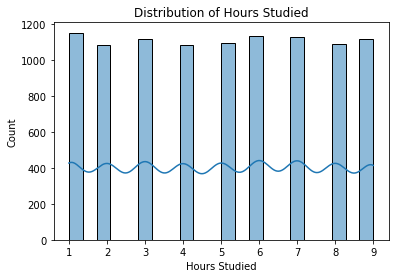

,Hours Studied,Frequency
0,1,1152
1,6,1133
2,7,1129
3,3,1119
4,9,1115
5,5,1094
6,8,1088
7,2,1085
8,4,1085


In [966]:
# Variable distributions for (Hours Studied)
plot_histogram(student_performance, 'Hours Studied')
variable_distribution_table(student_performance, 'Hours Studied')

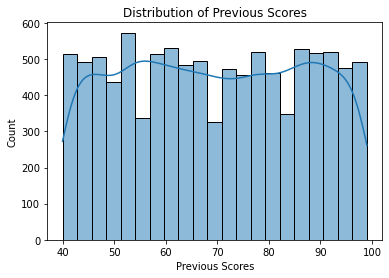

,Previous Scores,Frequency
0,54,216
1,87,208
2,56,192
3,62,184
4,89,182
5,77,181
6,53,181
7,60,181
8,58,176
9,52,176


In [967]:
# Variable distributions for (Previous Scores)
plot_histogram(student_performance, 'Previous Scores')
variable_distribution_table(student_performance, 'Previous Scores')

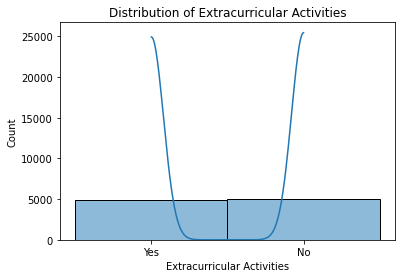

,Extracurricular Activities,Frequency
0,No,5052
1,Yes,4948


In [968]:
# Variable distributions for (Extracurricular Activities)
plot_histogram(student_performance, 'Extracurricular Activities')
variable_distribution_table(student_performance, 'Extracurricular Activities')

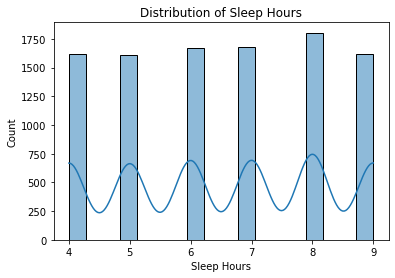

,Sleep Hours,Frequency
0,8,1804
1,7,1676
2,6,1673
3,9,1622
4,4,1619
5,5,1606


In [969]:
# Variable distributions for (Sleep Hours)
plot_histogram(student_performance, 'Sleep Hours')
variable_distribution_table(student_performance, 'Sleep Hours')

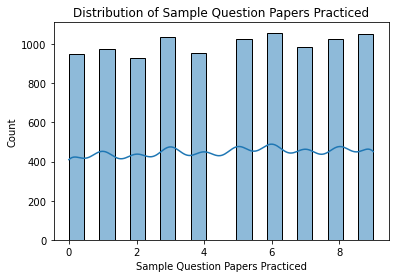

,Sample Question Papers Practiced,Frequency
0,6,1059
1,9,1051
2,3,1035
3,5,1028
4,8,1026
5,7,987
6,1,978
7,4,955
8,0,951
9,2,930


In [970]:
# Variable distributions for (Sample Question Papers Practiced)
plot_histogram(student_performance, 'Sample Question Papers Practiced')
variable_distribution_table(student_performance, 'Sample Question Papers Practiced')

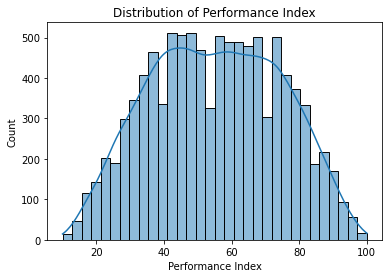

,Performance Index,Frequency
0,67.0,187
1,45.0,185
2,49.0,181
3,56.0,181
4,40.0,180
...,...,...
86,98.0,7
87,99.0,6
88,11.0,5
89,100.0,3


In [971]:
# Variable distributions for (Performance Index)
plot_histogram(student_performance, 'Performance Index')
variable_distribution_table(student_performance, 'Performance Index')

In [972]:
# Deleting duplicate rows to enhances data quality
student_performance = student_performance.drop_duplicates()
student_performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [973]:
# Change the variable type to integer instead of string to make it easier to work with and compare values
def transform_extracurricular_activities(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return -1

def process_data(student_performance):
    student_performance['Extracurricular Activities'] = student_performance['Extracurricular Activities'].apply(transform_extracurricular_activities)
    return student_performance

student_performance = process_data(student_performance.copy())
student_performance


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [974]:
# Change 'Performance Index' type from float64 to int64 because its already rounded to the nearest integer
student_performance['Performance Index'] = student_performance['Performance Index'].astype(int)
student_performance['Performance Index']

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 9873, dtype: int64

In [975]:
# Grouping the 'Previous Scores' column to make it meaningful categories
student_performance['Previous Scores'] = pd.cut(student_performance['Previous Scores'], [0,60,70,80,90,100])
student_performance.groupby('Previous Scores').size()

Previous Scores
(0, 60]      3506
(60, 70]     1637
(70, 80]     1587
(80, 90]     1680
(90, 100]    1463
dtype: int64

In [976]:
# Grouping the 'Performance Index' column to make it meaningful categories
student_performance['Performance Index'] = pd.cut(student_performance['Performance Index'], [0,20,40,60,80,100])
student_performance.groupby('Performance Index').size()

Performance Index
(0, 20]       265
(20, 40]     2265
(40, 60]     3274
(60, 80]     3013
(80, 100]    1056
dtype: int64

In [977]:
student_performance.to_csv('Dataset/cleaned_student_performance.csv', index=False)